<a href="https://colab.research.google.com/github/cyam04/Pwc-Digital-intelligence-/blob/main/Task%202%20Pwc%20Di.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

**Let's start by loading the dataset and then proceed with building the classification model:**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the dataset

In [28]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

**Display the first few rows of the dataset**

In [29]:
# Display the first few rows of the dataset
print(data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

**let's preprocess it and build the classification model:**

In [30]:
# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

# Drop unnecessary columns (if any)
data = data.drop(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features (X) and target variable (y)
X = data.drop('y', axis=1)
y = data['y']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7303
           1       0.62      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238

[[7194  109]
 [ 755  180]]


It will load the dataset, preprocess it by encoding categorical variables and dropping unnecessary columns, splits it into training and testing sets, standardizes the features, trains a logistic regression model, makes predictions, and evaluates the model using classification report and confusion matrix.

**Data preprocessing and model training for Random Forest**

In [31]:
# Data preprocessing and model training for Random Forest
data_rf = data_main.copy()
le = LabelEncoder()
data_rf['y'] = le.fit_transform(data_rf['y'])
data_rf = data_rf.drop(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
data_rf = pd.get_dummies(data_rf, drop_first=True)
X_rf = data_rf.drop('y', axis=1)
y_rf = data_rf['y']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train_rf)
X_test_rf = scaler_rf.transform(X_test_rf)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_rf, y_train_rf)
rf_y_pred = rf_model.predict(X_test_rf)
print("\nRandom Forest Model:")
print("Classification Report:")
print(classification_report(y_test_rf, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_rf, rf_y_pred))


Random Forest Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7303
           1       0.45      0.24      0.32       935

    accuracy                           0.88      8238
   macro avg       0.68      0.60      0.63      8238
weighted avg       0.86      0.88      0.86      8238

Confusion Matrix:
[[7025  278]
 [ 706  229]]


**Data preprocessing and model training for SVM**

In [21]:
data_svm_xgb = data_main.copy()
le = LabelEncoder()
data_svm_xgb['y'] = le.fit_transform(data_svm_xgb['y'])
data_svm_xgb = data_svm_xgb.drop(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
data_svm_xgb = pd.get_dummies(data_svm_xgb, drop_first=True)
X_svm_xgb = data_svm_xgb.drop('y', axis=1)
y_svm_xgb = data_svm_xgb['y']
X_train_svm_xgb, X_test_svm_xgb, y_train_svm_xgb, y_test_svm_xgb = train_test_split(X_svm_xgb, y_svm_xgb, test_size=0.2, random_state=42)
scaler_svm_xgb = StandardScaler()
X_train_svm_xgb = scaler_svm_xgb.fit_transform(X_train_svm_xgb)
X_test_svm_xgb = scaler_svm_xgb.transform(X_test_svm_xgb)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_svm_xgb, y_train_svm_xgb)
svm_y_pred = svm_model.predict(X_test_svm_xgb)
print("\nSupport Vector Machine Model:")
print("Classification Report:")
print(classification_report(y_test_svm_xgb, svm_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_svm_xgb, svm_y_pred))


Support Vector Machine Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.63      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238

Confusion Matrix:
[[7198  105]
 [ 757  178]]


**Train the XGBoost classifier**

In [22]:
# Train the XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_svm_xgb, y_train_svm_xgb)
xgb_y_pred = xgb_model.predict(X_test_svm_xgb)
print("\nXGBoost Model:")
print("Classification Report:")
print(classification_report(y_test_svm_xgb, xgb_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_svm_xgb, xgb_y_pred))


XGBoost Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.56      0.24      0.34       935

    accuracy                           0.89      8238
   macro avg       0.73      0.61      0.64      8238
weighted avg       0.87      0.89      0.87      8238

Confusion Matrix:
[[7125  178]
 [ 710  225]]


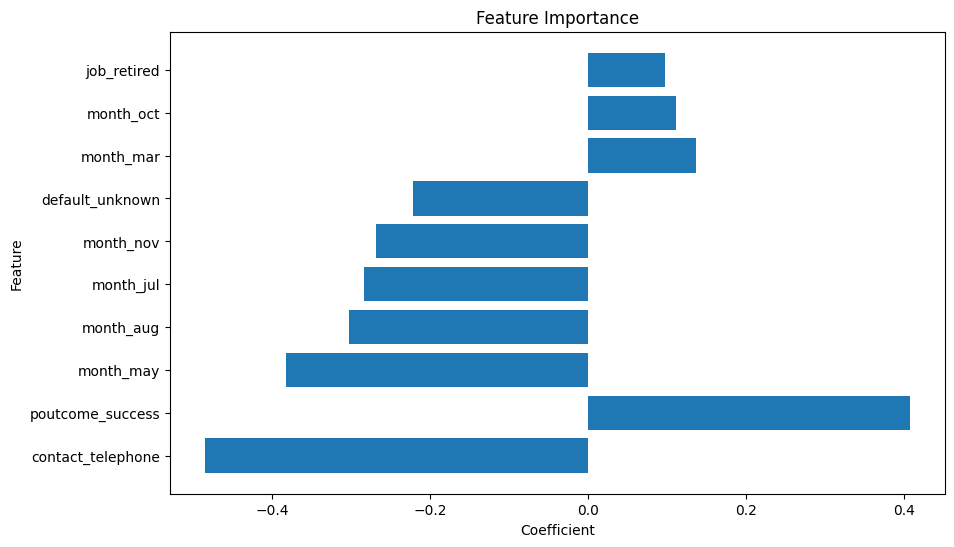

In [23]:
# Get feature names
feature_names = X.columns

# Get coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a dataframe to store feature names and coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort feature importance by coefficient magnitude
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [25]:
pip install shap

In [24]:
import shap

# Initialize shap explainer
explainer = shap.Explainer(model, X_train)

# Get SHAP values for all observations in the test set
shap_values = explainer.shap_values(X_test)

# Get SHAP values for observation #4
shap_values_4 = shap_values[4]

# Plot SHAP values for observation #4
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_4, X_test[4], feature_names=X.columns)

# Get SHAP values for observation #20
shap_values_20 = shap_values[20]

# Plot SHAP values for observation #20
shap.force_plot(explainer.expected_value, shap_values_20, X_test[20], feature_names=X.columns)


# Added

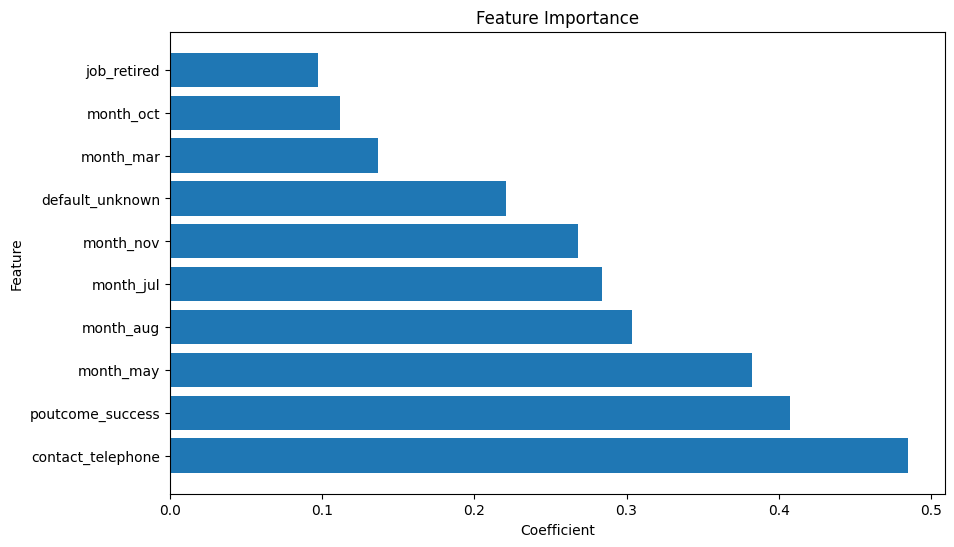

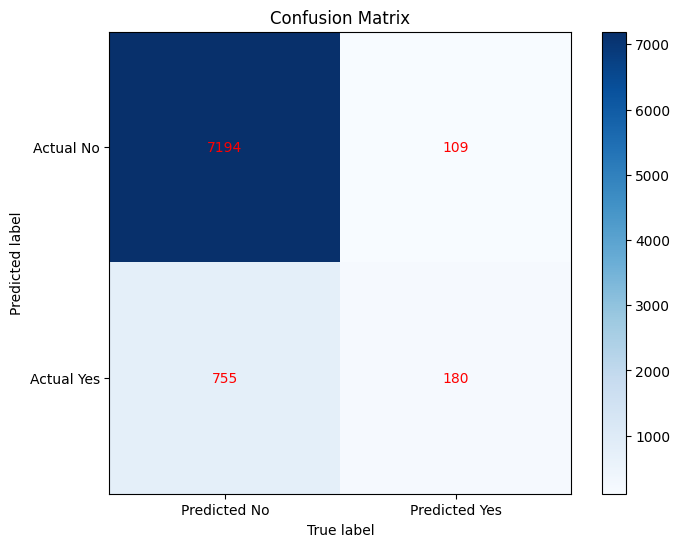

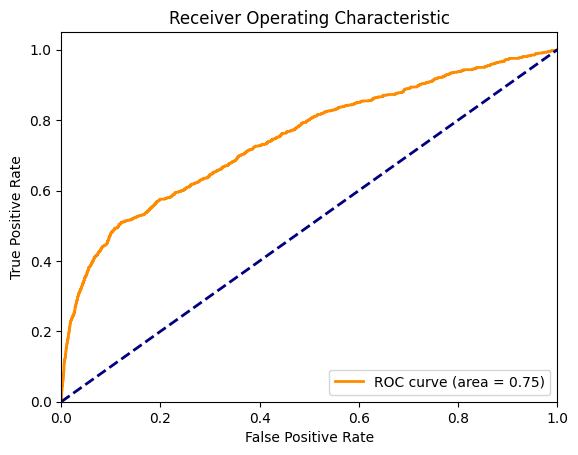

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.8873513  0.88759408 0.88990046 0.63239043 0.77698191]
Mean Cross-Validation Score: 0.814843636133632


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:


# Feature importance
coef = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(coef)})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Confusion matrix plot
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted No', 'Predicted Yes'])
plt.yticks([0, 1], ['Actual No', 'Actual Yes'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))




In [32]:
# SHAP (SHapley Additive exPlanations) analysis for XGBoost model
explainer = shap.Explainer(xgb_model, X_train_svm_xgb)
shap_values = explainer.shap_values(X_test_svm_xgb)

# Plot SHAP values for observation #4
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[4], X_test_svm_xgb[4], feature_names=X_svm_xgb.columns)

# Plot SHAP values for observation #20
shap.force_plot(explainer.expected_value, shap_values[20], X_test_svm_xgb[20], feature_names=X_svm_xgb.columns)


 97%|=================== | 7968/8238 [00:27<00:00]       